<a href="https://colab.research.google.com/github/Eakiz04/MAT421_Project/blob/main/Project_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temperature Estimation Using Interpolation

By Eric Kizior
04/27/2025
---

# Introduction

Data collection of temperature often contains missing data due to various factors such as malfunctions with the measuring instrument, data transmission errors, data collection gaps, or simply human error. This missing data can significantly affect the accuracy of weather forecasting and climate models. To correct this missing data, **Lagrange Interpolation**, **Spline Interpolation**, and **Polynomial Regression** can be used to estimate the missing data to create a more accurate representation of the data. This project's goal is to use the interpolation methods and compare their results to analyze and compare the accuracy of each technique.

# Related Work


Accurate estimation of missing temperature data is a common challenge many researchers attempt to understand better. One study by Afrifa-Yamoah, Mueller, Taylor, and Fisher (2020), examines the frequency of missing data in high-resolution environmental datasets and aims to resolve this issue through methods such as Kalman smoothing, ARIMA, and multiple linear regression. Their findings suggest that multiple linear regression model yielded the most accurate results. While their study focuses on different methods, their method of comparing various techniques aligns with this project's goal of assessing multiple approaches for handling missing temperature data.

In a second study by Rafał Jasiński (2016), the author explores the use of cubic spline interpolation and cubic polynomial interpolation to estimate missing data related to air temperature. The study concluded that cubic spline interpolation provides high accuracy, particularly for shorter time intervals. This aligns directly with this project's goal of evaluating the accuracy of spline interpolation for finding missing temperature data. This studies insights will prove useful as a guide for our expected spline interpolation results and provide a framework for analyzing the effectiveness of this method within this project.

Overall, both studies assist in understanding how to address missing temperature data in environmental datasets. As these studies demonstrated, the type of method is essential for creating accurate estimations, and this project aims to build on their findings by comparing and analyzing the effectiveness of Lagrange Interpolation, Spline Interpolation, and Polynomial Regression in imputing missing temperature data

# Proposed methodology / models


This project aims to estimate missing temperature data using three key methods: Lagrange Interpolation, Spline Interpolation, and Polynomial Regression. Each of these methods offers a unique approach to handling missing data, and they will be analyzed and compared based on their accuracy in predicting missing temperature values from the Global Earth Temperatures dataset above.


**1. Lagrange Interpolation**
  
Lagrange interpolation finds a single polynomial that goes through all the data points. This polynomial is referred to as a Lagrange polynomial. The key advantage of Lagrange interpolation is its flexibility in handling irregularly spaced data points, making it suitable for environmental datasets.

$P_i(x)=\prod_{j=1,j \ne i}^n\frac{x-x_j}{x_i-x_j}$

$L(x)=\sum_{i=1}^ny_iP_i(x)$

$P_i(x_j)=1$ when $i=j$

$P_i(x_j)=0$ when $i \ne j$

**2. Spline Interpolation**

Spline interpolation uses piecewise polynomials to approximate missing data. Unlike Lagrange interpolation, which uses a single polynomial to fit all data points, spline interpolation fits polynomials to small sections of the data. Cubic splines are used where the points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ are joined by cubic polynomial $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$ that is valid for $x_i \leq x \leq x_{i+1}$ for i = 1, ... , n-1. This provides a smooth connection, which is crucial when modeling environmental data, as abrupt changes in the data could lead to incorrect predictions


**3. Polynomial Regression**

Polynomial regression uses higher-degree polynomials to fit the data. Polynomial regression can capture non-linear relationships between independent and dependent variables, for this project that is time and temperature respectively.

$y= β_0 + β_1x + β_3x^2 + β_4x^3 + ... + β_nx^n$

**4. Root Mean Squared Error (RMSE)**

To evaluate the performance of each interpolation and regression method, the Root Mean Squared Error (RMSE) will be used as the primary metric. RMSE measures the average magnitude of the errors between the predicted and the actual values. It is widely used in statistical modeling and machine learning.

$RMSE= \sqrt{\frac{1}{2} \sum_{i=1}^n (y_i-\hat{y}_i)}$

Where:

$y_i$ represents the actual value

$\hat{y}_i$ represents the expected value

$n$ represents the number of data points

# Experiment setups

In this section, the experimental designs for evaluating and comparing the interpolation methods will be detailed.

**1. Data Base**

The Global Earth Temperatures dataset (https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures) contains global temperature measurements over several years, but it also includes missing values due to various data collection and transmission errors. If necessary, additional known data points may be removed to simulate varying levels of missing data. This will allow for a more accurate evaluation of how each interpolation method performs with datasets of different levels of completeness. For the implementation of the different methods, the monthly values will be used. Since those values have no missing data, 15% of the known values from the monthly dataset values will be removed. This will be done to simulate missing data, while still allowing us to compare the results of each interpolation method with the original values.

**2. Implementation**

Lagrange Interpolation, Spline Interpolation, and Polynomial Regression will be applied to find estimated values of missing temperature data points simulated from the monthly temperatures. The scipy.interpolate functions will be used to perform the interpolations. The resulting interpolations will be compared against the original dataset containing all original values.

**3. Evaluation**

The Root Mean Squared Error will be the primary metric used to evaluate the accuracy of each method. For this project, polynomial regression will be used to predict the missing data points, and the interpolation methods will be compared against it. Accuracy will not be the only metric being evaluated, the efficiency of each method will also be compared.

# Expected Results

According to the findings from the related works and our current understanding of the interpolation methods, it is expected that Polynomial Regression will be the most accurate method. Of the other two interpolation methods, Spline Interpolation is likely to yield the most accurate results, especially for shorter intervals as described by Rafał Jasiński. On the other hand, Lagrange Interpolation may be less accurate due to its reliance on fitting a single polynomial expression to the entire dataset. Since we are using a large dataset, it is also very possible Lagrange Interpolation will not be able to function properly due to its habit to diverge when used on large datasets, such as the Global Earth Temperature data set we are working with. Should this be the case, the Lagrange Interpolation method will be modified to be able to run within this experiment.

# Implementation

The following is the implementaion of the Lagrange Interpolation, Spline Interpolation, and Polynomial Regression for the Global Earth Temperature dataset. Each method will be performed and the outputs will be compared at the end.

*    Data setup:

    *    Uploads the Global Earth Temperature dataset
    *    Saves the full monthly dataset values for later comparison
    *    Removes random monthly values to simulate missing data

In [152]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Global_Temperature.csv')

# Only working with monthly values
df['Monthly Anomaly'] = df['Monthly Anomaly'].astype(float)


# Randomly remove 15% of data in monthly anomaly column
np.random.seed(111)
selected = int(len(df) * .15)
removed_data = np.random.choice(df.index, selected, replace=False)

# Creates a backup of complete dataset
df['Origin Monthly Anomaly'] = df['Monthly Anomaly']

# Creates the simulated dataset with missing values
df.loc[removed_data, 'Monthly Anomaly'] = np.nan
df_data = df.dropna(subset=['Monthly Anomaly'])
x = df_data.index.values
y = df_data['Monthly Anomaly'].values
x_new = df[df['Monthly Anomaly'].isnull()].index.values

Mounted at /content/drive


*    Lagrange Interpolation
    *    lagrange() cannot compute such a large data set so lagrange polynomial is implemented in batches
    *    A lagrange polynomial is performed on every 50 values of the dataset, then is appended to the previous lagrange polynomial

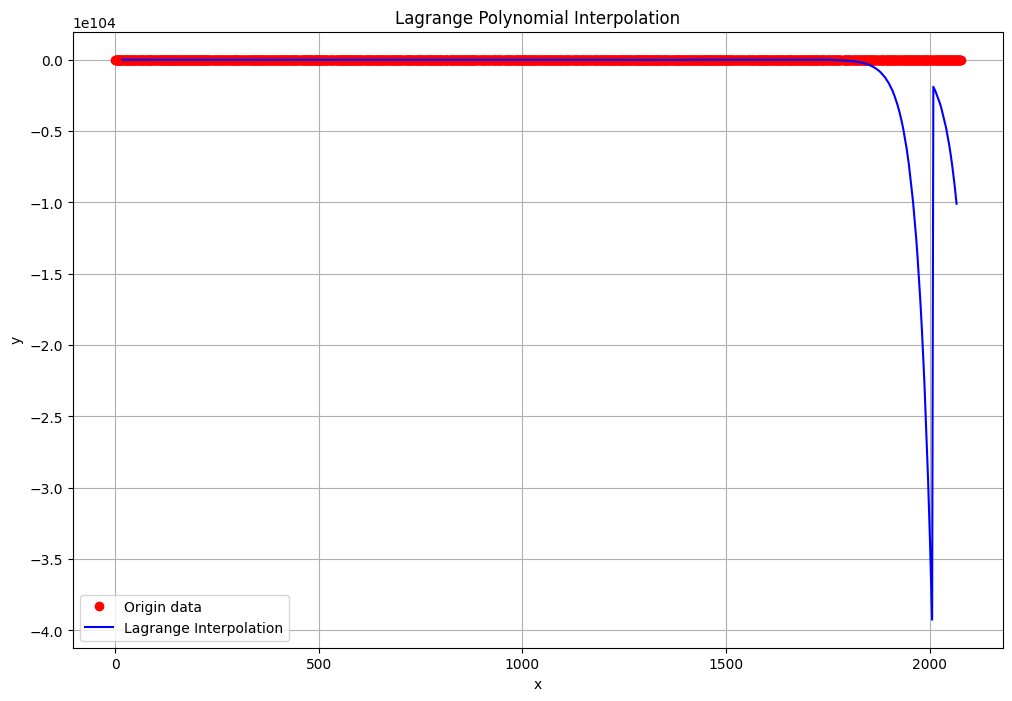

In [153]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

# Dataset is too large so predictions are done in largest possible batches
# and appended together.
def lagrange_pred(x_val, y_val, x_num):
    preds = []
    for i in range(0, len(x_num), 50):
        x_batch = x_val[i:i + 50]
        y_batch = y_val[i:i + 50]

        # Predict using small Lagrange Polynomials
        f_lag = lagrange(x_batch, y_batch)
        preds.extend(f_lag(x_num[i:i + 50]))
    return np.array(preds)

lagrange_Int = lagrange_pred(x, y, x_new)

# Plot
fig = plt.figure(figsize=(12,8))
plt.plot(x, y, 'ro', label='Origin data')
plt.plot(x_new, lagrange_Int, 'b', label='Lagrange Interpolation')
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

*    Spline Interpolation

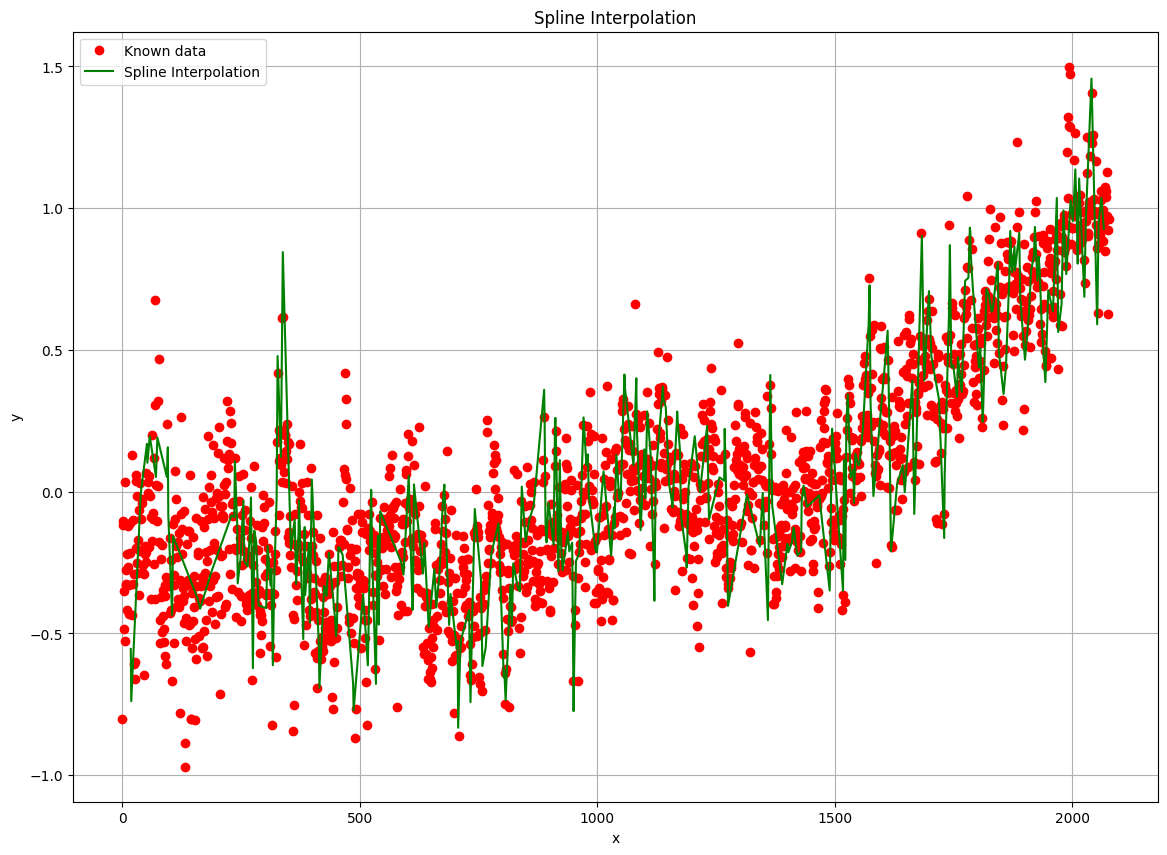

In [154]:
from scipy.interpolate import CubicSpline

f_spline = CubicSpline(x, y)
spline_Int = f_spline(x_new)

# Plot
fig = plt.figure(figsize=(14,10))
plt.plot(x, y, 'ro', label='Known data')
plt.plot(x_new, spline_Int, 'g', label='Spline Interpolation')
plt.title('Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

*    Polynomial Regression

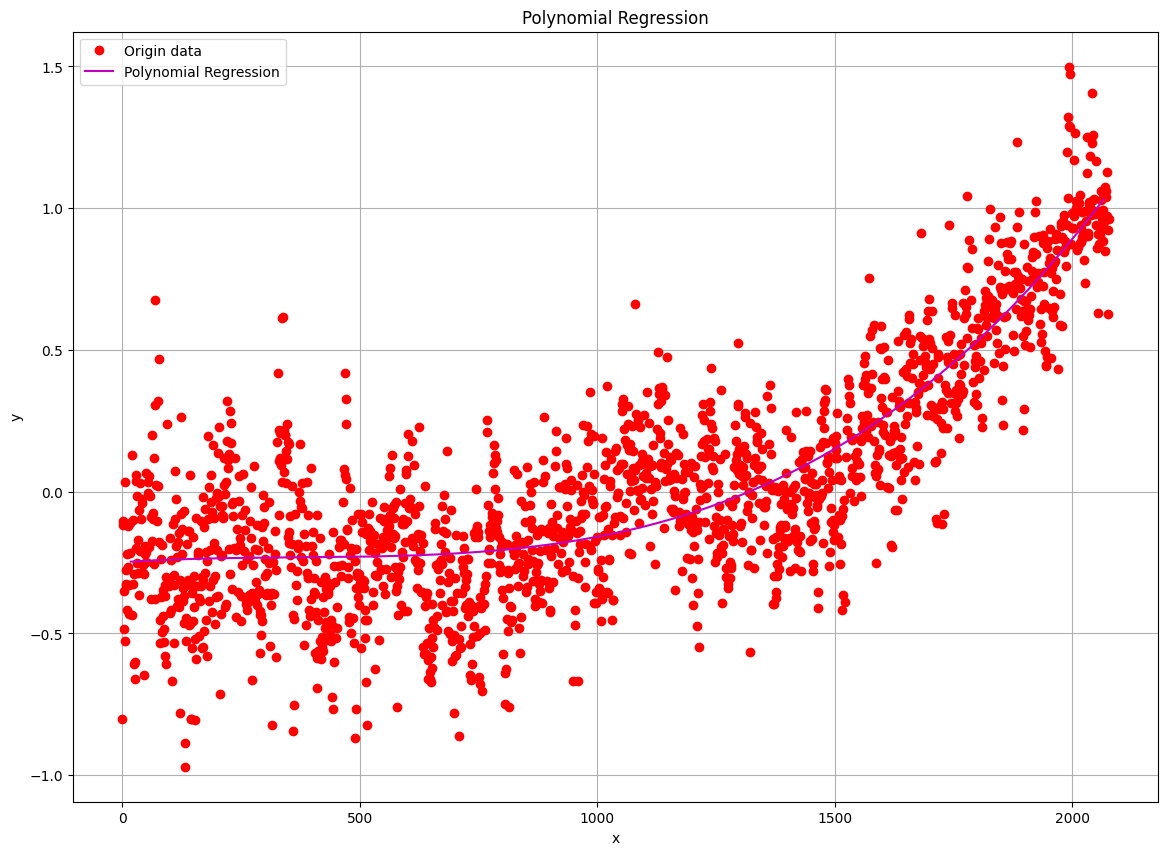

In [155]:
c = np.polyfit(x, y, 3)
poly = np.poly1d(c)
poly_Int = poly(x_new)

# Plot
fig = plt.figure(figsize=(14,10))
plt.plot(x, y, 'ro', label='Origin data')
plt.plot(x_new, poly_Int, 'm', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

*    Comparison
    *    RMSE is calculated using the original monthly temperature data which contains the actually recorded values and compares that to the predicted values derived from each method

In [156]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each method
rmse_lagrange = np.sqrt(mean_squared_error(df.loc[removed_data, 'Origin Monthly Anomaly'], lagrange_Int))
rmse_spline = np.sqrt(mean_squared_error(df.loc[removed_data, 'Origin Monthly Anomaly'], spline_Int))
rmse_poly = np.sqrt(mean_squared_error(df.loc[removed_data, 'Origin Monthly Anomaly'], poly_Int))

print(f"RMSE for Lagrange Interpolation: {rmse_lagrange}")
print(f"RMSE for Spline Interpolation: {rmse_spline}")
print(f"RMSE for Polynomial Regression: {rmse_poly}")

RMSE for Lagrange Interpolation: 4.66088939884942e+103
RMSE for Spline Interpolation: 0.6364473051563221
RMSE for Polynomial Regression: 0.5678125113485931


# Analysis

This section analyzes the results of implementing the Lagrange Interpolation, Spline Interpolation, and Polynomial Regression. Here we will examine each method and compare them based on how they performed in this experiment, as well as compare their performances to the expectations we had based on their mathmatical models and the related research we found earlier in this paper.

Each method will have the following analysis sections:
*   An initial analysis which will cover a brief summary of the method along with any note worthy observations during implementation
*   A performance analyse, which will cover the results of the methods implemention, exploring its accuracy and comparing it to the other methods results as well
*   An expectation analysis which will compare the results of the methods to that of the expectations we derived from their models and the related works that we discussed previously in this paper.

**1. Lagrange Interpolation**

**Initial Analysis**

Lagrange Interpolation finds a single polynomial that goes through all the data points, however, in order to conduct this experiment we had to perform the Lagrange Interpolation in smaller batches. Due to the limits of python/scipy, the lagrange() function could not be performed over such a large data set, therefore a batch method involving taking the lagrange polynomial over a range of 50 values at a time to find the Lagrange Interpolation was implemented.

**Performance**

For this experiment, the Lagrange Interpolation performed very poorly. Not only did we need to perform a modified version of the Lagrange Interpolation using batches, but the results were still completely inaccurate, having a RMSE for Lagrange Interpolation of 4.66088939884942e+103. The inaccracy is also evident from the graph, where we can see how the Lagrange Interpolation fails. The graph contains rapid and extreme oscillations ending in a significant divergence. Not only was the data set too large for Lagrange Interpolation, but the range between values is too great for Lagrange, which is what resulted in the oscillations. Lagrange Interpolation may be suitable for small data sets, but when it comes to predicting missing data of weather values, the Lagrange Interpolation is completely unsuitable.

**Expected vs Results**

Although it was expected for Lagrange Interpolation to perform poorly, the level at which it struggled with this type of data set was suprising. That being said, Afrifa-Yamoah, Mueller, Taylor, and Fisher (2020) highlighted the limitations of polynomial methods, including Lagrange, in their study on missing temperature data. They noted that while polynomial methods can work in smaller datasets, they are prone to instability when data gaps are significant or when the dataset is large. This aligned exactly with our results for implementing Lagrange Interpolation as well.

**2. Spline Interpolation**

**Initial Analysis**

Spline Interpolation, specifically cubic spline interpolation, fits piecewise cubic polynomials between each pair of adjacent data points. Unlike the Lagrange Interpolation, this method was able to perform well enough to provide comparable data.

**Performance**

Spline Interpolation performed well in this experiment, the graph demonstrated its ability to provide reasonable predictions for missing data, which is further supported by its RMSE with an RMSE value of 0.636, indicating relatively accurate predictions. Spline interpolation proved to also be more computationally efficient compared to Lagrange. Since it incorporates a piecewise approach, this allowed for smaller calculations at each segment, leading to more efficient calculations.

**Expected vs Results**

As described by Jasiński (2016), Spline Interpolation normally struggles when the dataset's underlying pattern is not relatively smooth, like in our experiment's data. This is evident from our graph where we can see how the Spline Interpolation cannot always accurately predict data points that do not follow a specific pattern, which for weather data can occur quite often. Despite this, the Spline Interpolation performed relatively well, which is what we expected.

**3. Polynomial Regression**

**Initial Analysis**

Polynomial Regression fits a polynomial of a specified degree to the data points, which can capture non-linear relationships between variables. In this case, polynomial regression was applied using a third-degree polynomial. Unlike interpolation methods that pass through all data points, Polynomial Regression seeks to find the best-fit polynomial curve by minimizing the overall error between the model and the data.

**Performance**

Polynomial Regression performed well, achieving an RMSE of
0.568, which was the most accurate RMSE values of the three methods, although only slightly better than Spline Interpolation. The graph of the Polynomial Regression curve displayed a smooth and reasonable approximation, avoiding the large swings observed in Lagrange and the slight deviations sometimes seen in Spline Interpolation. Polynomial Regression's computation is also the fastest and most stable of the three methods. Overall, Polynomial Regression had the best performance.

**Expected vs Results**
Afrifa-Yamoah, Mueller, Taylor, and Fisher (2020) found that multiple linear regression methods provided the most accurate results when estimating missing temperature data. Although they used linear regression, the regression-based approach to model missing data aligns with our findings, where polynomial regression outperformed all other prediction methods.

# Conclusion

The goal of this paper was to evaluate Lagrange Interpolation, Spline Interpolation, and Polynomial Regression for estimating missing temperature data using the Global Earth Temperatures dataset. We analyzed the mathematical model of each method as well as research similar articles written by others related to interpolation methods and data prediction. Finally we compared the performance of these methods, focusing on accuracy, efficiency, and suitability for large datasets.

After implementing each method, we can conclude that our findings were largely consistent with the related works of Afrifa-Yamoah, Mueller, Taylor, and Fisher (2020) and Jasiński (2016). Polynomial regression performed best in terms of both accuracy and efficiency, providing the best approach for estimating missing temperature data. Spline interpolation also performed well, only struggling to predict values outside the smooth pattern of data values, which aligned well with Jasiński's finding. However, Lagrange interpolation struggled significantly due to its inefficiency and tendency to produce unstable results when applied to larger datasets, although it was expected to struggle, its level of failure proves it's not suitable for this type of dataset.

In conclusion, polynomial regression is the most suitable method for this experiment, offering a balance of accuracy, efficiency, and stability. Spline interpolation also remains a viable alternative but can struggle with accuracy in some scenarios, but Lagrange interpolation is not recommended for large datasets or datasets related to temperature, as it tends to diverge when the data set is too large or when the values have a large range between them like with weather conditions.

# References

Afrifa-Yamoah, E., Mueller, U. A., Taylor, S. M., & Fisher, A. J. (2020). Imputation of missing values in high-resolution temporal climate data. Meteorological Applications, 27(3), e1873. https://rmets.onlinelibrary.wiley.com/doi/full/10.1002/met.1873

Jasiński, R. (2016). Use of interpolation methods for modeling one-dimensional environmental data. Environmental and Climate Technologies, 18(1), 5-18. https://www.sciencedirect.com/science/article/pii/S1944398624037524

Beach, J. (2022). Global Earth Temperatures Dataset. Kaggle. https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures